In [1]:
## DONE ##
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
#import numpy as np
import yaml

In [2]:
## DONE ##
#opens yaml file
try:
    with open("../config.yaml") as file:
        config = yaml.safe_load(file)
except:
    print("Sorry, configuration file not found!")

In [3]:
## DONE ##
# Load the dataset from yaml file directory
df2 = pd.read_csv(config['input_data']['mentalhealth_file'])
df2

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,NaN,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia


In [4]:
# DONE #
def df_mentalhealth_cleaning(df2):
    
    """
    Cleans the Impact_of_Remote_Work_on_Mental_Health.csv DataFrame by 
    performing multiple data preparation steps.
    """
    
    #Rename the columns

    df2.columns = df2.columns.str.lower()
    
    #Creating columns to reflect categories of rating columns
    
    def support_remote_grade(grade):
        if grade <= 2:
            return 'Low'
        if grade == 3:
            return 'Medium'
        else:
            return 'High'

    df2['degree_of_remote_support'] = df2['company_support_for_remote_work'].apply(support_remote_grade)


    def social_isolation(rating):
        if rating <= 2:
            return 'Low'
        if rating == 3:
            return 'Medium'
        else:
            return 'High'

    df2['degree_of_social_isolation'] = df2['social_isolation_rating'].apply(social_isolation)


    def degree_work_life_balance(grade):
        if grade <= 2:
            return 'Low'
        if grade == 3:
            return 'Medium'
        else:
            return 'High'

    df2['degree_of_work-life_balance'] = df2['work_life_balance_rating'].apply(degree_work_life_balance)

    #Dropping unneeded columns
    df2 = df2.drop(columns = ['employee_id', 'industry', 'mental_health_condition', 'access_to_mental_health_resources','physical_activity', 'sleep_quality', 'region'])

    #Renaming work_location column

    df2.rename(columns={'work_location': 'work_type'}, inplace = True)

    #Filtering for tech roles

    df2_cleaned = df2[df2["job_role"].isin(['Data Scientist', 'Software Engineer', 'Project Manager'])]

    return df2_cleaned


In [5]:
df2_cleaned = df_mentalhealth_cleaning(df2)
df2_cleaned

,age,gender,job_role,years_of_experience,work_type,hours_worked_per_week,number_of_virtual_meetings,work_life_balance_rating,stress_level,productivity_change,social_isolation_rating,satisfaction_with_remote_work,company_support_for_remote_work,degree_of_remote_support,degree_of_social_isolation,degree_of_work-life_balance
1,40,Female,Data Scientist,3,Remote,52,4,1,Medium,Increase,3,Satisfied,2,Low,Medium,Low
2,59,Non-binary,Software Engineer,22,Hybrid,46,11,5,Medium,No Change,4,Unsatisfied,5,High,High,High
3,27,Male,Software Engineer,20,Onsite,32,8,4,High,Increase,3,Unsatisfied,3,Medium,Medium,High
7,42,Non-binary,Data Scientist,6,Onsite,54,7,3,Medium,Decrease,5,Satisfied,4,High,High,Medium
8,56,Prefer not to say,Data Scientist,9,Hybrid,24,4,2,High,Decrease,2,Unsatisfied,4,High,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,39,Prefer not to say,Software Engineer,11,Hybrid,50,10,3,Low,Decrease,2,Neutral,5,High,Low,Medium
4987,32,Prefer not to say,Software Engineer,9,Hybrid,24,15,2,Medium,No Change,4,Neutral,4,High,High,Low
4990,58,Prefer not to say,Project Manager,10,Onsite,45,10,1,High,Increase,5,Unsatisfied,3,Medium,High,Low
4991,60,Female,Data Scientist,9,Hybrid,57,4,2,Low,Increase,4,Satisfied,5,High,High,Low


In [10]:
# Double checking cleaned dataset
df2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2145 entries, 1 to 4992
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   age                              2145 non-null   int64 
 1   gender                           2145 non-null   object
 2   job_role                         2145 non-null   object
 3   years_of_experience              2145 non-null   int64 
 4   work_type                        2145 non-null   object
 5   hours_worked_per_week            2145 non-null   int64 
 6   number_of_virtual_meetings       2145 non-null   int64 
 7   work_life_balance_rating         2145 non-null   int64 
 8   stress_level                     2145 non-null   object
 9   productivity_change              2145 non-null   object
 10  social_isolation_rating          2145 non-null   int64 
 11  satisfaction_with_remote_work    2145 non-null   object
 12  company_support_for_remote_work  2145 n

In [8]:
# Double checking cleaned dataset for null values
df2_cleaned.isna().sum()

age                                0
gender                             0
job_role                           0
years_of_experience                0
work_type                          0
hours_worked_per_week              0
number_of_virtual_meetings         0
work_life_balance_rating           0
stress_level                       0
productivity_change                0
social_isolation_rating            0
satisfaction_with_remote_work      0
company_support_for_remote_work    0
degree_of_remote_support           0
degree_of_social_isolation         0
degree_of_work-life_balance        0
dtype: int64

In [6]:
## DONE ##
#Export to a csv
df2_cleaned.to_csv(config['output_data']['mentalhealth_file'], index=False)

In [7]:
# Summary statistics, select only numeric columns
df2_cleaned.groupby('work_type').describe()

age                                                      \
           count       mean        std   min   25%   50%   75%   max   
work_type                                                              
Hybrid     697.0  40.189383  11.411894  22.0  30.0  40.0  50.0  60.0   
Onsite     705.0  41.021277  11.291381  22.0  31.0  41.0  51.0  60.0   
Remote     743.0  41.273217  11.052773  22.0  31.0  42.0  51.0  60.0   

          years_of_experience             ... social_isolation_rating       \
                        count       mean  ...                     75%  max   
work_type                                 ...                                
Hybrid                  697.0  18.081779  ...                     4.0  5.0   
Onsite                  705.0  17.652482  ...                     4.0  5.0   
Remote                  743.0  17.601615  ...                     4.0  5.0   

          company_support_for_remote_work                                     \
                                    count      mean       std  min  25%  50%   
work_type                                                                      
Hybrid                              697.0  3.002869  1.386508  1.0  2.0  3.0   
Onsite                              705.0  3.078014  1.403480  1.0  2.0  3.0   
Remote                              743.0  3.045760  1.381649  1.0  2.0  3.0   

                     
           75%  max  
work_type            
Hybrid     4.0  5.0  
Onsite     4.0  5.0  
Remote     4.0  5.0  

[3 rows x 56 columns]

In [8]:
# Mental health and work type
mentalhealth_worklocation = df2_cleaned.groupby('work_type')[[ 'work_life_balance_rating', 'social_isolation_rating']].mean()
display(mentalhealth_worklocation)

,work_life_balance_rating,social_isolation_rating
work_type,,
Hybrid,3.010043,2.991392
Onsite,2.933333,2.995745
Remote,3.053836,2.938089


In [9]:
df2_cleaned.groupby('work_type')[['number_of_virtual_meetings', 'social_isolation_rating']].mean()

,number_of_virtual_meetings,social_isolation_rating
work_type,,
Hybrid,7.229555,2.991392
Onsite,7.780142,2.995745
Remote,7.530283,2.938089


In [10]:
worklocation_worklifebalance = df2_cleaned.pivot_table(index = 'work_type', columns = None, values = 'work_life_balance_rating')
display(worklocation_worklifebalance)

,work_life_balance_rating
work_type,
Hybrid,3.010043
Onsite,2.933333
Remote,3.053836


In [11]:
#Remote work satisfaction
remotework_satisfaction = df2_cleaned.groupby('satisfaction_with_remote_work')[['company_support_for_remote_work', 'social_isolation_rating']].mean()
display(remotework_satisfaction)

,company_support_for_remote_work,social_isolation_rating
satisfaction_with_remote_work,,
Neutral,2.998603,3.008380
Satisfied,3.090784,2.971114
Unsatisfied,3.037037,2.943020


- From the table avobe we can see that people who are satisfied with remote work do receive slightly
higher company support for remote work, and feel a little more socially isolated than people who feel
unsatisfied with remote work (0.03 diff).

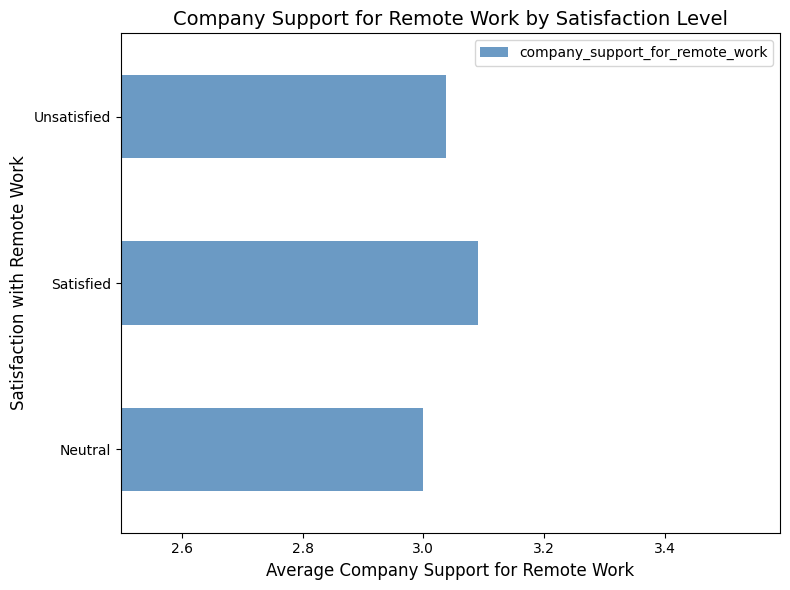

In [12]:

# Grouping by satisfaction_with_remote_work and calculating the mean for company_support_for_remote_work
remotework_satisfaction = df2_cleaned.groupby('satisfaction_with_remote_work')[['company_support_for_remote_work']].mean()

# Plotting a horizontal bar chart with elegant colors
remotework_satisfaction.plot(kind='barh', figsize=(8, 6), color=['#6B9AC4', '#77B7B1', '#D6A68C'])  # Elegant soft blue, teal, and taupe

# Adjusting the x-axis to zoom in more and make the differences visible
plt.xlim(remotework_satisfaction.min().min() - 0.5, remotework_satisfaction.max().max() + 0.5)  # Tightened range

# Adding labels and title
plt.xlabel('Average Company Support for Remote Work', fontsize=12)
plt.ylabel('Satisfaction with Remote Work', fontsize=12)
plt.title('Company Support for Remote Work by Satisfaction Level', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()




- The graph above shows us people who are satisfied with remote work do receive more support from their company to work remotely, on average.

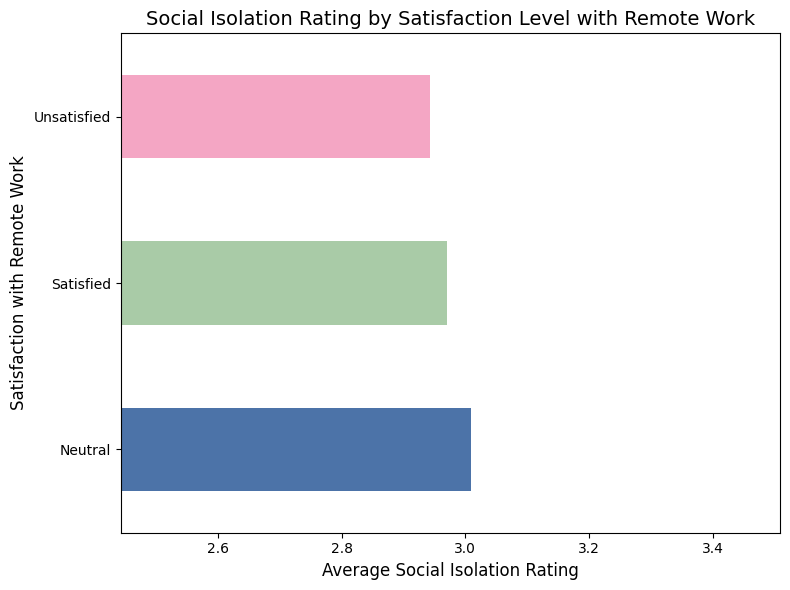

In [13]:

# Grouping by satisfaction_with_remote_work and calculating the mean for social_isolation_rating
remotework_satisfaction = df2_cleaned.groupby('satisfaction_with_remote_work')['social_isolation_rating'].mean()

# Plotting a horizontal bar chart with elegant colors
remotework_satisfaction.plot(kind='barh', figsize=(8, 6), color=['#4C73A8', '#A9CBA7', '#F4A6C4'])  # Soft blue, green, and pink

# Adjusting the x-axis to zoom in more and make the differences visible
plt.xlim(remotework_satisfaction.min() - 0.5, remotework_satisfaction.max() + 0.5)  # Tightened range

# Adding labels and title
plt.xlabel('Average Social Isolation Rating', fontsize=12)
plt.ylabel('Satisfaction with Remote Work', fontsize=12)
plt.title('Social Isolation Rating by Satisfaction Level with Remote Work', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


- This graph above tells us that satisfied remote workers do feel a little more socially isolated,
  although that can be interpreted as a tradeoff they are willing to assume. 

In [14]:
#Work type and productivity

worklocation_productivity = df2_cleaned.groupby('work_type')[['number_of_virtual_meetings', 'hours_worked_per_week']].mean()
display(worklocation_productivity)

,number_of_virtual_meetings,hours_worked_per_week
work_type,,
Hybrid,7.229555,39.839311
Onsite,7.780142,39.617021
Remote,7.530283,39.717362


- the table above shows us the number of virtual meetings and hours worked per week are essentially the same for all categories. If we assume hours worked per week is the amount of hours needed to complete the work, the table demonstrates employees have the same efficiency and productivity no matter the type of work location.

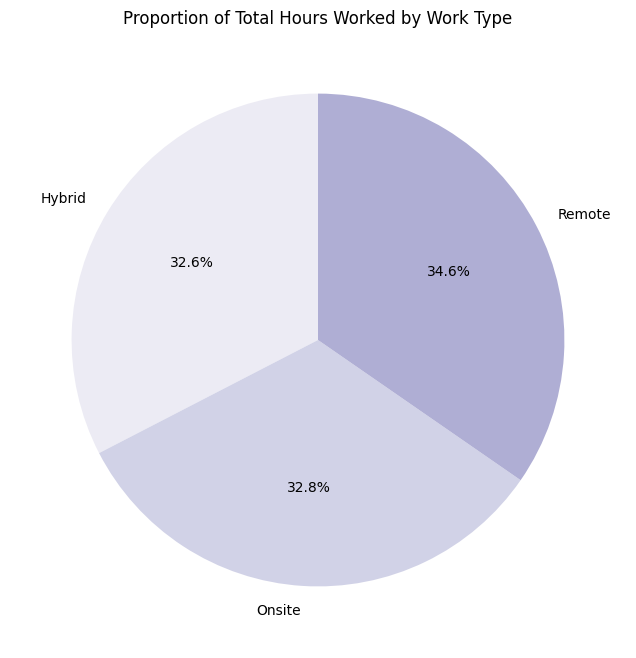

In [15]:
# Calculate the total or average hours worked per work type
hours_distribution = df2_cleaned.groupby('work_type')['hours_worked_per_week'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(hours_distribution, labels=hours_distribution.index, autopct='%1.1f%%', startangle=90, colors=sb.color_palette('Purples'))
plt.title('Proportion of Total Hours Worked by Work Type')
plt.show()


- In summary, our findings regarding mental health and productivity in relation to the type of work (hybrid, remote, or onsite) tell us that people who feel satisfied with the remote work environment receives more support from their company to sustain a remote work setting, which can include things like virtual team-building activities or facilitating equipment for the employee's home office. 
- Additionally, the data shows us that people who are satisfied with remote work feel slightly more socially isolated than people who do not feel satisfied with this seeting. This tells us that feeling slightly more isolated is a tradeoff that employees who prefer remote work environments are willing to assume.
- Lastly, we could see that the total hours worked by individuals in all three settins was essentially the same. If we assume hours worked per week is the amount of hours needed to complete the work, which is a reasonable assumption in the tech sector, the table demonstrates employees have the same efficiency and productivity no matter the type of work (remote, hybrid, or inperson).

'satisfaction level with remote work: '

,company_support_for_remote_work,social_isolation_rating
satisfaction_with_remote_work,,
Neutral,2.998603,3.008380
Satisfied,3.090784,2.971114
Unsatisfied,3.037037,2.943020


'From the table avobe we can see that people who are satisfied with remote work do receive slightly higher company support for remote work, and feel a little more socially isolated than people who feel unsatisfied with remote work (0.03 diff).'

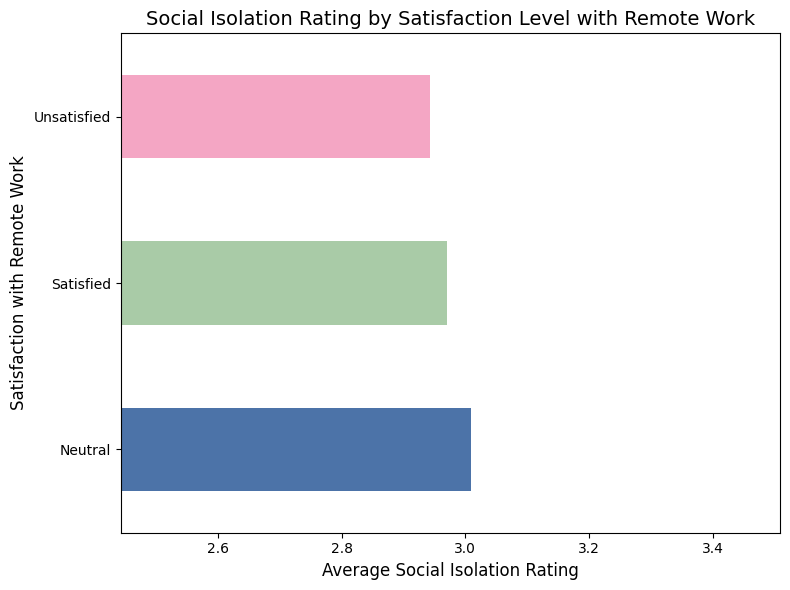

'This graph above tells us that satisfied remote workers do feel a little more socially isolated, although that can be interpreted as a tradeoff they are willing to assume.\n'

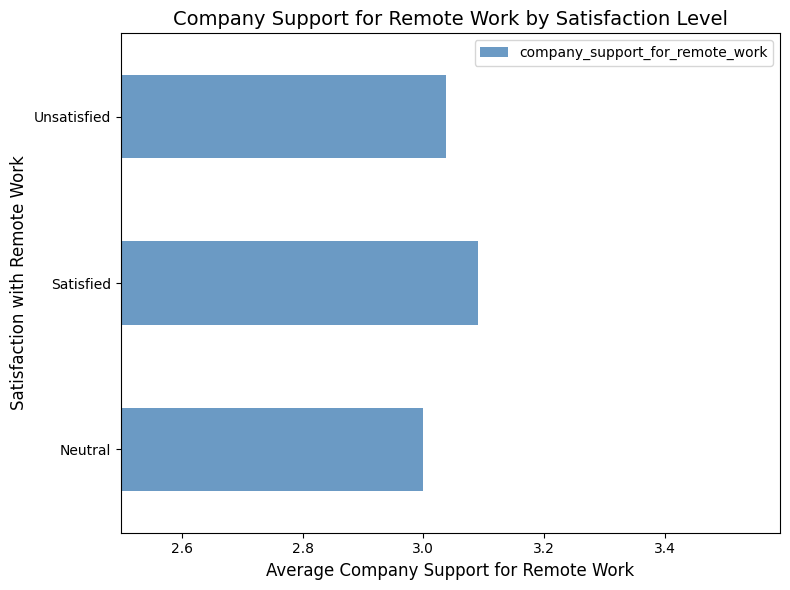

'The graph above shows us people who are satisfied with remote work do receive more support from their company to work remotely, on average.'

In [16]:
def satisfaction_mentalhealth():
   

    remotework_satisfaction = df2_cleaned.groupby('satisfaction_with_remote_work')[['company_support_for_remote_work', 'social_isolation_rating']].mean()
    display('satisfaction level with remote work: ', remotework_satisfaction)

    display('From the table avobe we can see that people who are satisfied with remote work do receive slightly higher company support for remote work, and feel a little more socially isolated than people who feel unsatisfied with remote work (0.03 diff).')

       
    # Grouping by satisfaction_with_remote_work and calculating the mean for social_isolation_rating
    remotework_satisfaction = df2_cleaned.groupby('satisfaction_with_remote_work')['social_isolation_rating'].mean()

    # Plotting a horizontal bar chart with elegant colors
    remotework_satisfaction.plot(kind='barh', figsize=(8, 6), color=['#4C73A8', '#A9CBA7', '#F4A6C4'])  # Soft blue, green, and pink

    # Adjusting the x-axis to zoom in more and make the differences visible
    plt.xlim(remotework_satisfaction.min() - 0.5, remotework_satisfaction.max() + 0.5)  # Tightened range

    # Adding labels and title
    plt.xlabel('Average Social Isolation Rating', fontsize=12)
    plt.ylabel('Satisfaction with Remote Work', fontsize=12)
    plt.title('Social Isolation Rating by Satisfaction Level with Remote Work', fontsize=14)

    # Display the plot
    plt.tight_layout()
    plt.savefig("../figures/satisfaction_mentalhealth_barplots_1.jpeg", format="jpeg", dpi=300)
    plt.show()

    display('This graph above tells us that satisfied remote workers do feel a little more socially isolated, although that can be interpreted as a tradeoff they are willing to assume.\n')


    # Grouping by satisfaction_with_remote_work and calculating the mean for company_support_for_remote_work
    remotework_satisfaction = df2_cleaned.groupby('satisfaction_with_remote_work')[['company_support_for_remote_work']].mean()

    # Plotting a horizontal bar chart with elegant colors
    remotework_satisfaction.plot(kind='barh', figsize=(8, 6), color=['#6B9AC4', '#77B7B1', '#D6A68C'])  # Elegant soft blue, teal, and taupe

    # Adjusting the x-axis to zoom in more and make the differences visible
    plt.xlim(remotework_satisfaction.min().min() - 0.5, remotework_satisfaction.max().max() + 0.5)  # Tightened range

    # Adding labels and title
    plt.xlabel('Average Company Support for Remote Work', fontsize=12)
    plt.ylabel('Satisfaction with Remote Work', fontsize=12)
    plt.title('Company Support for Remote Work by Satisfaction Level', fontsize=14)

    # Display the plot
    plt.tight_layout()
    plt.savefig("../figures/satisfaction_mentalhealth_barplots_2.jpeg", format="jpeg", dpi=300)
    plt.show()

    display('The graph above shows us people who are satisfied with remote work do receive more support from their company to work remotely, on average.')

satisfaction_mentalhealth()

'work type and productivity: '

,number_of_virtual_meetings,hours_worked_per_week
work_type,,
Hybrid,7.229555,39.839311
Onsite,7.780142,39.617021
Remote,7.530283,39.717362


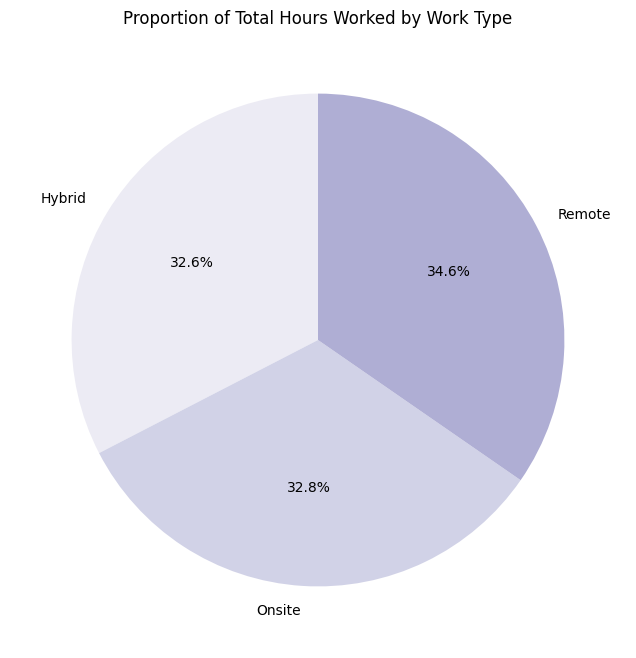

'the table above shows us the hours worked per week are essentially the same for all categories. If we assume hours worked per week is the amount of hours needed to complete the work, which is a reasonable assumption in the tech sector, the table demonstrates employees have the same efficiency and productivity no matter the type of work (remote, hybrid, or inperson).'

In [21]:
def work_type_productivity(df2_cleaned):
    worktype_productivity = df2_cleaned.groupby('work_type')[['number_of_virtual_meetings', 'hours_worked_per_week']].mean()
    display('work type and productivity: ', worklocation_productivity)

    # Calculate the total or average hours worked per work type
    hours_distribution = df2_cleaned.groupby('work_type')['hours_worked_per_week'].sum()

    # Create a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(hours_distribution, labels=hours_distribution.index, autopct='%1.1f%%', startangle=90, colors=sb.color_palette('Purples'))
    plt.title('Proportion of Total Hours Worked by Work Type')
    plt.savefig("../figures/work_type_productivity_piechart.jpeg", format="jpeg", dpi=300)
    plt.show()

    display('the table above shows us the hours worked per week are essentially the same for all categories. If we assume hours worked per week is the amount of hours needed to complete the work, which is a reasonable assumption in the tech sector, the table demonstrates employees have the same efficiency and productivity no matter the type of work (remote, hybrid, or inperson).')

work_type_productivity(df2_cleaned)

In [22]:
# Creating table to show the distribution of employees working in the three different work types for low, medium and high stress levels 

def stress_worktype_rel(df2_cleaned):
    """
    Displaying correlation between stress levels (low, medium, high) and work type (remote, hybrid, onsite)
    """
    
    df_stress = df2_cleaned.groupby("stress_level")["work_type"].apply(lambda x: (x.value_counts(normalize=True) * 100))
    df_stress = df_stress.unstack()
    df_stress.columns = ['Remote', 'Hybrid', 'Onsite']
    row_order = ['Low', 'Medium', 'High']
    df_stress = df_stress.loc[row_order]
    df_stress['Total'] = df_stress.sum(axis=1)
    df_stress = df_stress.round({'Remote':2, 'Hybrid':2, 'Onsite':2})
   
    return df_stress

stress_worktype_table = stress_worktype_rel(df2_cleaned)
stress_worktype_table

,Remote,Hybrid,Onsite,Total
stress_level,,,,
Low,34.26,31.19,34.55,100.0
Medium,31.51,33.56,34.92,100.0
High,31.82,33.74,34.43,100.0


In [23]:
# Creating table to show the distribution of employees working in the three different job types for low, medium and high stress levels 

def stress_jobrole_rel(df2_cleaned):
    """
    Displaying correlation between stress levels (low, medium, high) and job role (Data Scientist, Project Manager, Software Engineer)
    """
    df_stress = df2_cleaned.groupby("stress_level")["job_role"].apply(lambda x: (x.value_counts(normalize=True) * 100))
    df_stress = df_stress.unstack()
    row_order = ['Low', 'Medium', 'High']
    df_stress = df_stress.loc[row_order]
    df_stress['Total'] = df_stress.sum(axis=1)
    df_stress = df_stress.round({'Data Scientist':2, 'Project Manager':2, 'Software Engineer':2})
   
    return df_stress

stress_jobrole_table = stress_jobrole_rel(df2_cleaned)
stress_jobrole_table

,Data Scientist,Project Manager,Software Engineer,Total
stress_level,,,,
Low,33.67,33.38,32.94,100.0
Medium,30.56,35.06,34.38,100.0
High,33.20,34.71,32.10,100.0


In [25]:
# Descriptive statistics for IT jobs grouped by work type

def descriptive_statistics_hours_worked(df2_cleaned):
    """
    Displaying descriptive statistics (mean, median, min, max) for several separate colums:
    1. hours_worked_per_week
    2. number_of_virtual_meetings
    3. work_life_balance_rating	
    4. company_support_for_remote_work
    """
    
    df_stats_hours_worked = df2_cleaned.groupby("work_type")[["hours_worked_per_week"]].agg(["mean", "median", "min", "max"]).reset_index()
    df_stats_hours_worked[("hours_worked_per_week", "mean")] = df_stats_hours_worked[("hours_worked_per_week", "mean")].round(2)
    display(df_stats_hours_worked)

    df_stats_virtual_meetings = df2_cleaned.groupby("work_type")[["number_of_virtual_meetings"]].agg(["mean", "median", "min", "max"]).reset_index()
    df_stats_virtual_meetings[("number_of_virtual_meetings", "mean")] = df_stats_virtual_meetings[("number_of_virtual_meetings", "mean")].round(2)
    display(df_stats_virtual_meetings)

    df_stats_work_life = df2_cleaned.groupby("work_type")[["work_life_balance_rating"]].agg(["mean", "median", "min", "max"]).reset_index()
    df_stats_work_life[("work_life_balance_rating", "mean")] = df_stats_work_life[("work_life_balance_rating", "mean")].round(2)
    display(df_stats_work_life)

    df_stats_company_support = df2_cleaned.groupby("work_type")[["company_support_for_remote_work"]].agg(["mean", "median", "min", "max"]).reset_index()
    df_stats_company_support[("company_support_for_remote_work", "mean")] = df_stats_company_support[("company_support_for_remote_work", "mean")].round(2)
    display(df_stats_company_support)
            
descriptive_statistics_hours_worked(df2_cleaned)

work_type hours_worked_per_week               
                             mean median min max
0    Hybrid                 39.84   40.0  20  60
1    Onsite                 39.62   39.0  20  60
2    Remote                 39.72   39.0  20  60

work_type number_of_virtual_meetings               
                                  mean median min max
0    Hybrid                       7.23    7.0   0  15
1    Onsite                       7.78    8.0   0  15
2    Remote                       7.53    7.0   0  15

work_type work_life_balance_rating               
                                mean median min max
0    Hybrid                     3.01    3.0   1   5
1    Onsite                     2.93    3.0   1   5
2    Remote                     3.05    3.0   1   5

work_type company_support_for_remote_work               
                                       mean median min max
0    Hybrid                            3.00    3.0   1   5
1    Onsite                            3.08    3.0   1   5
2    Remote                            3.05    3.0   1   5

(  work_type hours_worked_per_week               
                              mean median min max
 0    Hybrid                 39.84   40.0  20  60
 1    Onsite                 39.62   39.0  20  60
 2    Remote                 39.72   39.0  20  60,
   work_type number_of_virtual_meetings               
                                   mean median min max
 0    Hybrid                       7.23    7.0   0  15
 1    Onsite                       7.78    8.0   0  15
 2    Remote                       7.53    7.0   0  15,
   work_type work_life_balance_rating               
                                 mean median min max
 0    Hybrid                     3.01    3.0   1   5
 1    Onsite                     2.93    3.0   1   5
 2    Remote                     3.05    3.0   1   5,
   work_type company_support_for_remote_work               
                                        mean median min max
 0    Hybrid                            3.00    3.0   1   5
 1    Onsite               

## Other stuff ##


In [12]:
# Create a new dataframe filtering by remote worktype and only IT related jobs   
df2_remote = df2_cleaned[(df2_cleaned["work_type"] == "Remote") & (df2_cleaned["job_role"].isin(['Data Scientist', 'Software Engineer', 'Project Manager']))]
df2_remote


,age,gender,job_role,years_of_experience,work_type,hours_worked_per_week,number_of_virtual_meetings,work_life_balance_rating,stress_level,productivity_change,social_isolation_rating,satisfaction_with_remote_work,company_support_for_remote_work,degree_of_remote_support,degree_of_social_isolation,degree_of_work-life_balance
1,40,Female,Data Scientist,3,Remote,52,4,1,Medium,Increase,3,Satisfied,2,Low,Medium,Low
10,33,Non-binary,Software Engineer,17,Remote,48,3,3,High,Decrease,4,Satisfied,2,Low,High,Medium
14,36,Prefer not to say,Project Manager,23,Remote,59,11,3,High,Decrease,5,Neutral,3,Medium,High,Medium
18,49,Non-binary,Software Engineer,30,Remote,36,6,1,High,No Change,3,Satisfied,2,Low,Medium,Low
19,59,Male,Software Engineer,13,Remote,59,4,3,Medium,Decrease,4,Neutral,1,Low,High,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4954,26,Prefer not to say,Data Scientist,13,Remote,30,7,2,Low,Decrease,3,Unsatisfied,4,High,Medium,Low
4963,45,Female,Data Scientist,6,Remote,36,3,3,Medium,Increase,2,Unsatisfied,1,Low,Low,Medium
4966,24,Female,Project Manager,15,Remote,40,11,2,High,No Change,3,Neutral,1,Low,Medium,Low
4972,57,Non-binary,Software Engineer,11,Remote,25,5,2,Low,Increase,5,Unsatisfied,3,Medium,High,Low
